# Supermarket Sales Analysis – Data Science Project

## Context

This project analyses 1,000 transactions from three branches of a fictional supermarket located in Myanmar : Yangon, Mandalay, and Naypyitaw.  
The goal is to identify trends and generate actionable recommendations for the regional manager to improve sales and customer satisfaction.

##  (Résumé en français)

Ce projet analyse 1 000 ventes réalisées dans trois succursales d’un supermarché fictif situé en Myanmar (Birmanie).  
L’objectif est d’identifier des tendances clés et de proposer des recommandations concrètes pour améliorer les performances commerciales et la satisfaction client.

##  Objectives

- Identify the top-performing branches  
- Understand customer behaviour (e.g., gender, customer type, payment method)  
- Explore the most popular product lines  
- Analyse peak sales periods (by time and day)  
- Propose data-driven strategies to optimise performance

## Technologies Used

- Python (pandas, matplotlib, seaborn)  
- Google Colab

✅ The dataset contains 1,000 rows and 17 columns.  
It is well structured, with both **categorical variables** (e.g., `City`, `Gender`, `Product line`) and **numerical variables** (e.g., `Total`, `Quantity`, `Rating`).






## 🪞 1. Dataset Snapshot

In [13]:
##We use `df.head()` to display the first five rows.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/data science /supermarket_sales.csv')
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
df.head()



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10


The dataset includes key variables like `Invoice ID`, `Branch`, `Product line`, `Total`, `Payment`, and `Rating`.  
No missing values detected. Datatypes are consistent and suitable for visualisation and modeling.

 ## 🌆 2.1 Sales by City


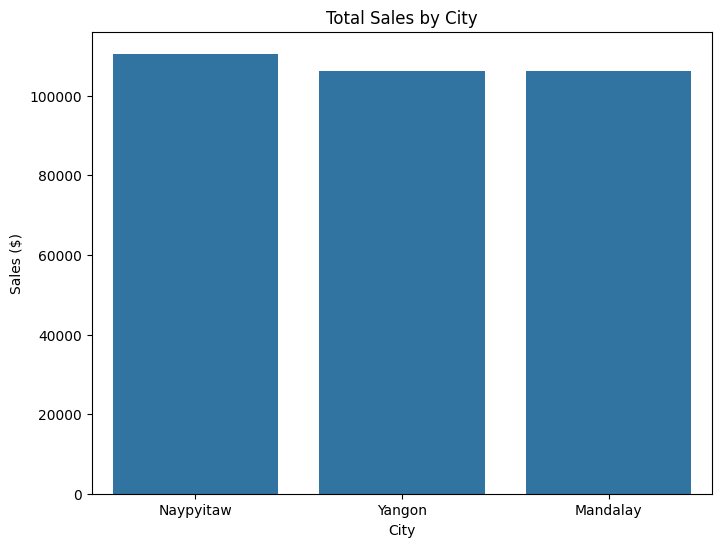

In [ ]:
sales_by_city = df.groupby('City')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=sales_by_city.index, y=sales_by_city.values)
plt.title("Total Sales by City")
plt.ylabel("Sales ($)")
plt.xlabel("City")
plt.show()


 Naypyitaw generated the highest total revenue, followed by Yangon and Mandalay.  
This indicates that the Naypyitaw branch may have higher foot traffic or customer purchasing power, and could be prioritised for marketing campaigns or new services.


## 🍬 2.2 Sales by Product Line


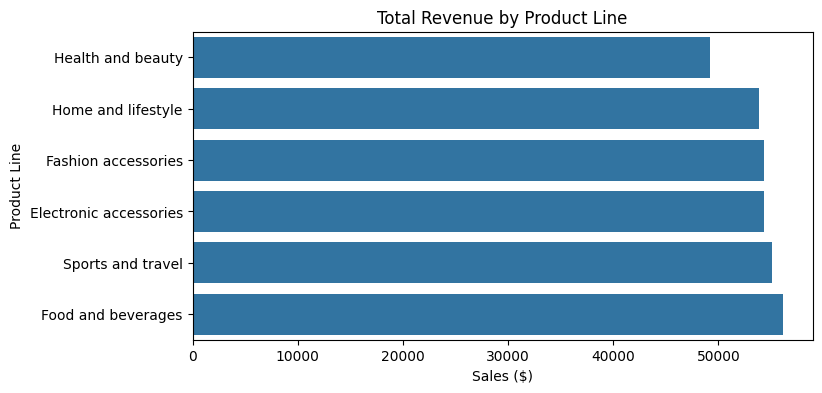

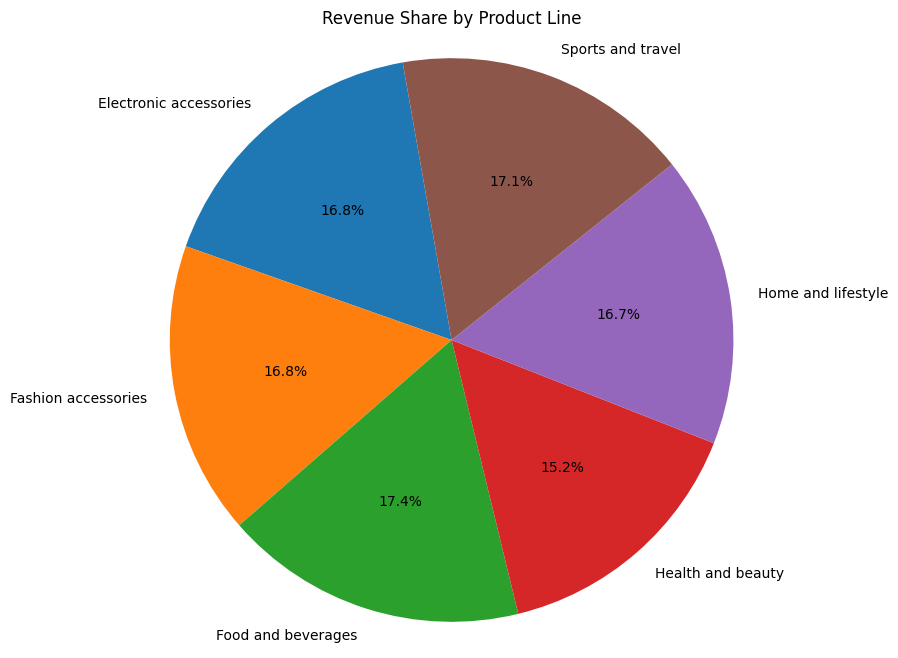

In [16]:
sales_by_product = df.groupby('Product line')['Total'].sum().sort_values(ascending=True)
plt.figure(figsize=(8,4))
sns.barplot(x=sales_by_product.values, y=sales_by_product.index)
plt.title("Total Revenue by Product Line")
plt.xlabel("Sales ($)")
plt.ylabel("Product Line")
plt.show()
sales_by_product = df.groupby('Product line')['Total'].sum()
plt.figure(figsize=(8,8))
plt.pie(sales_by_product, labels=sales_by_product.index, autopct='%1.1f%%', startangle=100)
plt.title("Revenue Share by Product Line")
plt.axis('equal')
plt.show()

  **"Food and Beverages"** and **"Sports and travel"** were the top-performing categories in terms of total revenue.  
This suggests that these product lines should be prioritised for promotions, inventory planning, and display optimisation.


## ⏰ 2.3 Sales by Hour


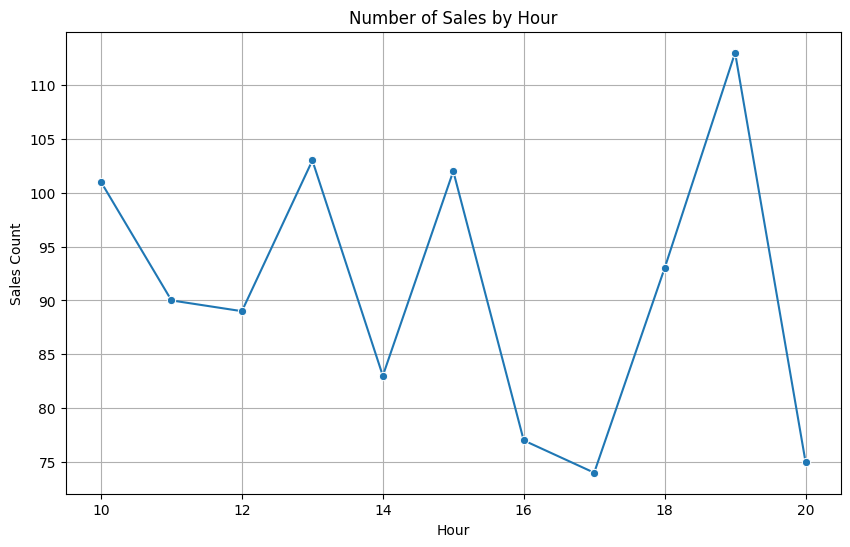

In [ ]:
sales_by_hour = df.groupby('Hour').size()
plt.figure(figsize=(10,6))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values, marker='o')
plt.title("Number of Sales by Hour")
plt.xlabel("Hour")
plt.ylabel("Sales Count")
plt.grid(True)
plt.show()


 There are noticeable peaks in sales around **1 PM** and **7 PM**, which correspond to lunch and early evening.  
This pattern can help the business optimise staffing, promotional efforts, and inventory replenishment during those time windows.


## 👨‍🦰 2.4 Sales by Gender

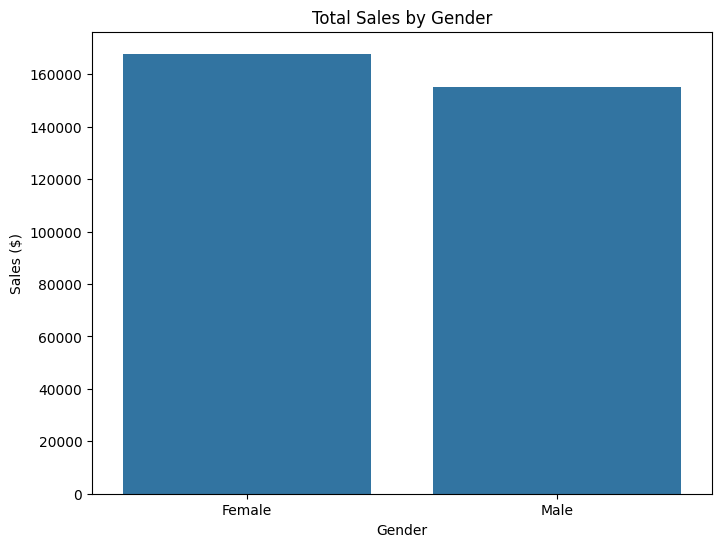

In [ ]:
sales_by_gender = df.groupby('Gender')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values)
plt.title("Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Sales ($)")
plt.show()



 Female customers generated slightly more revenue than male customers overall.  
This could inform targeted marketing strategies, with a focus on tailoring product recommendations or loyalty rewards to female shoppers.


## 👤 2.5 Sales by Customer Type

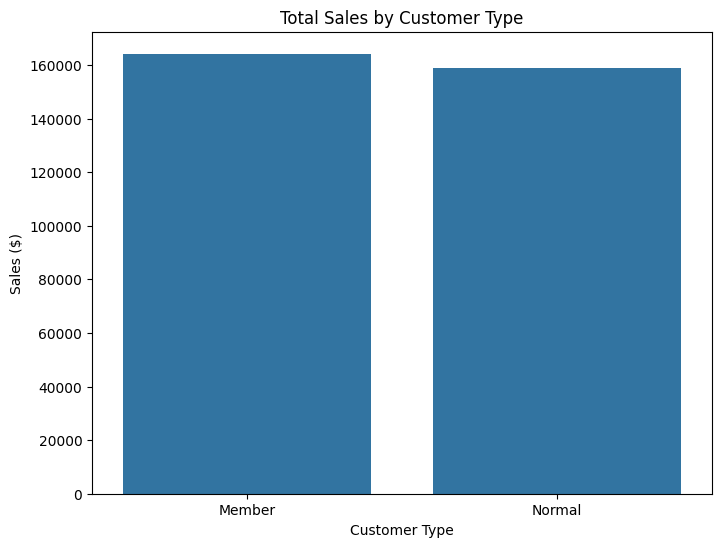

In [ ]:
sales_by_customer_type = df.groupby('Customer type')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=sales_by_customer_type.index, y=sales_by_customer_type.values)
plt.title("Total Sales by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Sales ($)")
plt.show()


 Member customers spent more in total than normal customers.  
This suggests that the loyalty programme is working and could be further reinforced to increase retention and average spending.


## 🏦 2.6 Customer Satisfaction vs Amount Spent

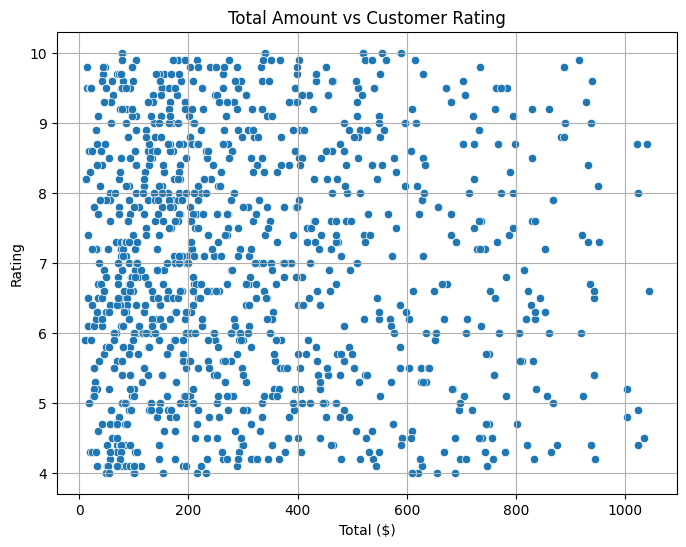

Pearson Correlation Coefficient: -0.04


In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total', y='Rating', data=df)
plt.title("Total Amount vs Customer Rating")
plt.xlabel("Total ($)")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

correlation = df['Total'].corr(df['Rating'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}")


 The Pearson correlation coefficient is -0.04, indicating **no meaningful relationship** between total amount spent and customer satisfaction.  
This implies that satisfaction depends more on service, experience, or other non-monetary factors, and not just on spending level.


## 2.7 💸 Sales by payment Methods

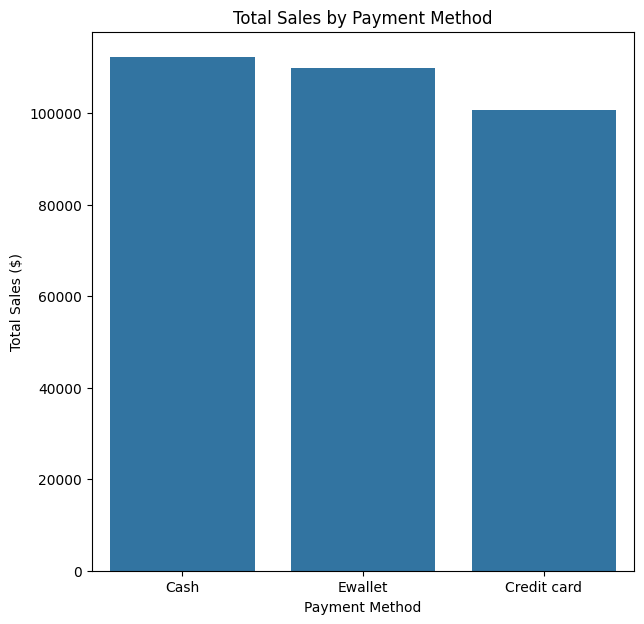

In [10]:
# Total des ventes par méthode de paiement
sales_by_payment = df.groupby('Payment')['Total'].sum().sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(7,7))
sns.barplot(x=sales_by_payment.index, y=sales_by_payment.values)
plt.title("Total Sales by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Total Sales ($)")
plt.show()


📌 Among the three payment methods, **Cash** generated the highest revenue, followed by **Ewallet** and **Credit Card**.  
This indicates that while digital payments are gaining traction, **cash remains the most dominant method** among customers.  
The supermarket should maintain strong support for cash handling while gradually improving digital payment options to accommodate changing preferences.



## 🖼️ 2.8 Sales by Day of the Week

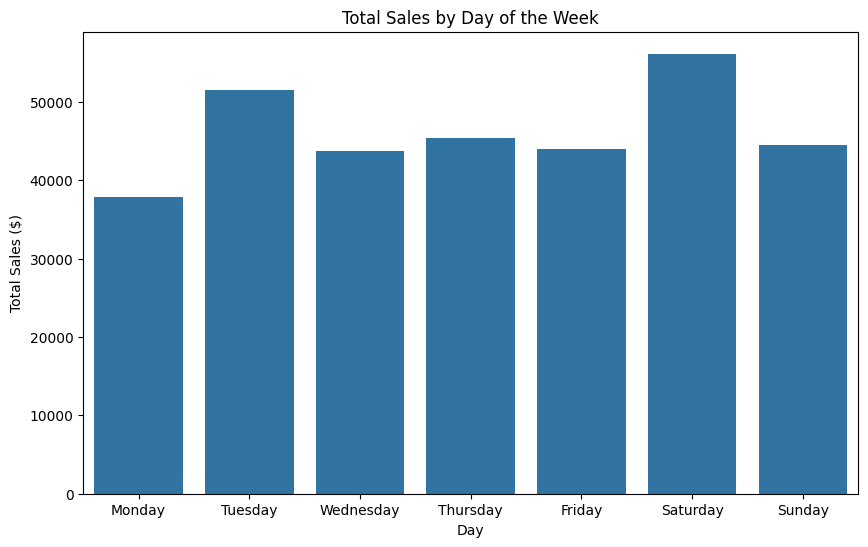

In [ ]:
# Extraire le jour de la semaine à partir de la date
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name()

# Total des ventes par jour
sales_by_day = df.groupby('Day')['Total'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Visualisation
plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values)
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Sales ($)")
plt.show()


The analysis reveals that **Saturday** generated the highest revenue,
This suggests that weekends are peak sales periods, and the supermarket should optimise staffing, stock levels, and marketing activities accordingly to meet higher customer demand.


## ✅ Key Business Recommendations

- Focus marketing efforts on **female customers** and **loyalty members**, as they generate slightly higher revenue.
- Schedule more staff and optimise operations during **weekends** and  **peak sales hours (1 PM and 7 PM)** to improve efficiency and customer experience.
- Boost inventory and promotions for the **best-performing product lines**, especially *Food and Beverages* and *Electronic Accessories*.
- Enhance **customer satisfaction** through service quality, since satisfaction is not directly linked to spending levels.


##  Conclusion

This project provided key insights into sales performance, customer behaviour, and satisfaction trends across multiple supermarket branches.  
Through visual analysis and a simple regression model, we identified opportunities to optimise operations and improve customer engagement.

While the predictive model offers a baseline, further improvements could involve advanced algorithms, time series forecasting, or customer segmentation.  
This project demonstrates the potential of data-driven decision-making in retail environments.

## ✅ Recommandations principales (Résumé en français)

- Mieux cibler les clientes et les membres fidèles dans les actions marketing  
- Renforcer les équipes et l’organisation pendant les weekends et les heures de pointe (13h et 19h)  
- Promouvoir davantage les catégories de produits les plus rentables  
- Améliorer la qualité de service pour renforcer la satisfaction, indépendamment du montant dépensé

